# Tarea 8 

### Sofía González Cataldo, rut 20.921.915-8

Considere una curva gaussiana con media $0$ y varianza $1$. Aproxime esta curva con una spline cúbica usando 5 puntos entre $ x = 0 $ y $ x = 2 $. Use esta spline para calcular la integral de la función. Compare el resultado con su valor exacto (ver la función de error de tareas anteriores).

In [1]:
# importar librerías
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# función para la curva gaussiana
def gauss(x, mu, sigma):
    return np.exp(-(x - mu)**2/2*sigma**2)/(np.sqrt(2*np.pi)*sigma)

In [3]:
def spline_coefs(puntos):
    '''
    Función que entrega los coeficientes de los polinomios utilizados
    en la interpolación de tipo "spline cúbica".
    '''
    n = len(puntos) - 1
    
    h = np.zeros(n)
    for i in range(n):
        h[i] = puntos[i + 1][0] - puntos[i][0]
    
    a = puntos[:,1]
    alpha = np.zeros(n - 1)
    for i in range(1, n):
        alpha[i-1] = (3/h[i])*(a[i+1] - a[i]) - (3/h[i-1])*(a[i] - a[i-1])
        
        
    # Se resuelve un sistema de ecuaciones:
    l = np.ones(n + 1)
    mu = np.zeros(n)
    z = np.zeros(n + 1)
    for i in range(1, n):
        l[i] = 2*(puntos[i+1][0] - puntos[i-1][0]) - h[i-1]*mu[i-1]
        mu[i] = h[i]/l[i]
        z[i] = (alpha[i-1] - h[i-1]*z[i-1])/l[i]
    b = np.zeros(n)
    c = np.zeros(n+1)
    d = np.zeros(n)
    for j in range(n-1,-1,-1):
        c[j] = z[j] - mu[j]*c[j+1]
        b[j] = (a[j+1] - a[j])/h[j] - h[j]*(c[j+1] + 2*c[j])/3
        d[j] = (c[j+1] - c[j])/(3*h[j])
        
    return a, b, c, d

In [4]:
def spline_eval(x, coefs, puntos):
    
    '''
    Entrega los polinomios utilizados para interpolar una función con
    una spline cúbica.
    '''
    if x >= puntos[-1,0]:
        return puntos[-1,1]
    elif x <= puntos[0,0]:
        return puntos[0,1]
    
    i = find_ind(x, puntos)
    a, b, c, d = coefs
    return (a[i] + b[i]*(x - puntos[i][0]) + \
            c[i]*(x - puntos[i][0])**2 + d[i]*(x - puntos[i][0])**3)

In [5]:
def find_ind(x, puntos):
    for i in range(len(puntos)):
        if x < puntos[i,0] and i != 0:
            return i-1

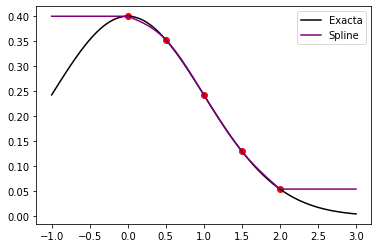

In [6]:
# puntos para la interpolación
xp = np.linspace(0, 2, 5)
# estos puntos se utilizarán de argumento para obtener los coeficientes
ptos = np.array([[xi, gauss(xi, 0, 1)] for xi in xp])
coefs = spline_coefs(ptos)
# puntos varios para las gráficas
x = np.linspace(-1, 3, 100)
# obtener los puntos de la aproximación
spline = [spline_eval(xi, coefs, ptos) for xi in x]
exacta = gauss(x, 0, 1)

plt.scatter(ptos[:,0], ptos[:,1], color='red')
plt.plot(x, exacta, label='Exacta', color='black')
plt.plot(x, spline, label='Spline', color='purple')
plt.legend()

In [7]:
from scipy import integrate # importar módulo de integración

In [8]:
integral_spline, error = integrate.quad(spline_eval, 0, 2, args=(coefs, ptos))
integral_spline

0.4765028227022264

El valor de la integral usando la spline cúbica es 0.4765028227022264.

El valor de una integral para una curva gaussiana está dada por:

$$
\int_0^a dx\,e^{-x^2} = \frac{\sqrt{\pi}}{2}\text{erf}(a)
$$

Sin embargo, esta integral debemos modificarla ya que $ x^2 = \frac{(x - \mu)^2}{2\sigma^2} $ y la acompaña una constante $ \frac{1}{\sqrt{2\pi}\sigma} $


Finalmente se obtiene que la integral es:

$$
\frac{1}{\sqrt{2\pi}\sigma} \int_0^a dx\,e^{-\frac{(x - \mu)^2}{2\sigma^2}} = \frac{1}{2}\text{erf}\left(\frac{a}{\sqrt{2}}\right)
$$

In [9]:
from scipy import special # importar módulo para función error

In [10]:
# Para este caso a = 2
integral_exacta = special.erf(2/np.sqrt(2))/2
integral_exacta

0.4772498680518208

El valor exacto de la integral de la gaussiana es 0.4772498680518208.

In [11]:
# Comparación de la integral exacta y la de la spline.
error = abs(integral_exacta - integral_spline)
error

0.0007470453495944107

El error entre el valor exacto de la integral y el valor de la integral de la spline es muy pequeño. La spline cúbica se asemeja casi en su totalidad a la gráfica exacta, la diferencia se observa en los primeros dos puntos (x = 0, x = 0.5). De hecho, la integral de la spline es menor a la de la gaussiana, lo que se puede notar en la gráfica, que la curva de la spline le falta un "trozo" de la curva real. La spline realiza una muy buena aproximación de la curva.

## Calificacion: 7.0